In [1]:
import numpy as np
import random

In [2]:
def genData(numPoints, A, K, variance):
    x=np.zeros(shape=(numPoints,2))
    y=np.zeros(shape=numPoints)
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (A*i+K)+random.uniform(0,1)*variance
    return x,y

In [3]:
x,y = genData(numPoints=100,A=2,K=100,variance=30)

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y =2.x + 100 + random.uniform(30)')]

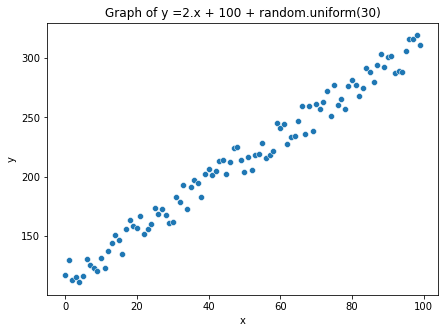

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x=x[:,1],y=y)
fig.set(xlabel ="x",ylabel="y",title='Graph of y =2.x + 100 + random.uniform(30)')

In [5]:
m,n =np.shape(x)
print("m (Length)= ", m, "and n (width)=", n)

m (Length)=  100 and n (width)= 2


In [6]:
print(x[0:5])

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


In [7]:
alpha = 0.0005
theta = np.ones(n)

print(theta)

[1. 1.]


In [8]:
print(x.T)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
  54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
  72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
  90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]


In [9]:
best_guess = np.dot(theta, x.T)
best_guess

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y=2.x+100+random.uniform(30)')]

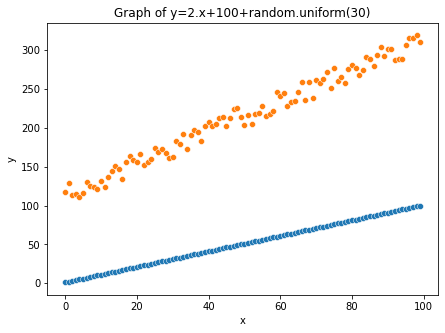

In [10]:
fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x=x[:,1],y=best_guess)
fig = sns.scatterplot(x=x[:,1],y=y)
fig.set(xlabel="x",ylabel="y",title='Graph of y=2.x+100+random.uniform(30)')

In [11]:
loss = best_guess - y
loss

array([-116.71978245, -127.61588869, -110.40239263, -111.33620995,
       -106.09776947, -110.65371127, -123.79723696, -117.57119018,
       -114.67448359, -110.93368195, -120.56834107, -111.55975195,
       -124.16473862, -130.67683335, -136.13630945, -131.16877836,
       -117.66294072, -138.29214631, -144.87672372, -138.89336974,
       -135.58585576, -144.75104453, -129.03606774, -132.34152234,
       -135.21277632, -147.51517952, -141.85525133, -144.87014183,
       -138.58839637, -130.75641611, -131.17280491, -151.1258845 ,
       -146.10898184, -158.78665286, -137.6498408 , -155.28553861,
       -160.06926869, -157.20076081, -144.22335756, -162.28501703,
       -166.00533795, -159.90258599, -161.96387035, -169.06322379,
       -168.79801978, -156.74073082, -165.41684893, -175.90833097,
       -176.38316455, -164.37037855, -153.12702559, -164.41282408,
       -152.36984687, -164.37189273, -164.09238168, -172.10642092,
       -158.56141209, -160.51993739, -163.17713424, -185.60422

In [12]:
cost = np.sum(loss **2)/(2*m)
cost

13844.386215640507

In [13]:
gradient = np.ones(n)
gradient[0] = 0
gradient[1] = 0
for i in range(len(x)):
    gradient[0]+= -(1/m)*(y[i]-((theta[0]*x[i,1])+theta[1]))
    gradient[1]+= -(1/m)*x[i,1]*y[i]-((theta[0]*x[i,1])+theta[1])
gradient

array([  -163.62404221, -17320.65781499])

In [14]:
gradient = np.dot(x.T, loss)/m
gradient

array([ -163.62404221, -8937.65781499])

In [15]:
theta = theta - alpha * gradient
theta

array([1.08181202, 5.46882891])

In [16]:
best_guess = np.dot(theta, x.T)

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y=2.x+100+random.uniform(30)')]

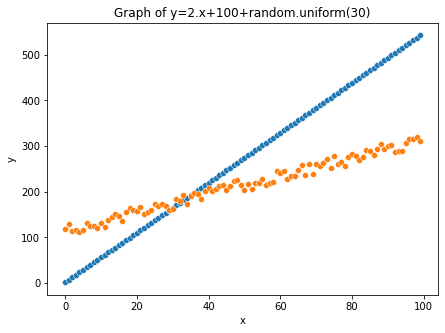

In [17]:
fig2 = plt.figure(figsize=(7,5))
fig2 = sns.scatterplot(x=x[:,1],y=best_guess)
fig2 = sns.scatterplot(x=x[:,1],y=y)
fig2.set(xlabel="x",ylabel="y",title='Graph of y=2.x+100+random.uniform(30)')

[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Graph of y=2.x+100+random.uniform(30)')]

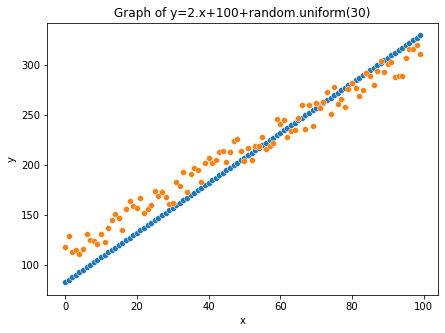

In [18]:
numIterations = 10000
for i in range(0,numIterations):
    best_guess = np.dot(theta, x.T)
    loss = best_guess -y
    cost = np.sum(loss **2)/(2*m)
    gradient = np.dot(x.T, loss)/m
    theta = theta - alpha *gradient

fig2 = plt.figure(figsize=(7,5))
fig2 = sns.scatterplot(x=x[:,1],y=best_guess)
fig2 = sns.scatterplot(x=x[:,1],y=y)
fig2.set(xlabel="x",ylabel="y",title='Graph of y=2.x+100+random.uniform(30)')

In [19]:
theta

array([82.83200878,  2.48838001])

In [20]:
def gradientDescent(x,y,theta,alpha,numIterations):
    x_length, x_width = np.shape(x)
    
    if(x_length!=y.size):
        raise Exception("Error in gradientDescent: Length of x and y data inputs are different")
    else: 
        m = x_length
    
    if (x_width <2 ):
        raise Exception("Error: x data must contain at least two columns with x=[0,n]=1")
        
    for i in range(0,numIterations):
        best_guess = np.dot(x,theta)
        loss = best_guess - y
        cost = np.sum(loss**2)/(2*m)
        gradient = np.dot(x.T, loss)/m
        theta = theta - alpha * gradient
        return theta

In [21]:
x, y = genData(numPoints = 100, A=2, K=100, variance = 30)
theta = np.ones(n)
print(n)

2


In [22]:
theta = gradientDescent(x,y,theta,alpha=0.0005,numIterations = 10000)
theta

array([1.0820663 , 5.45684315])

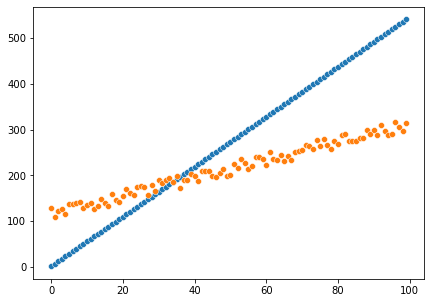

In [23]:
best_guess = np.dot(theta, x.T)
fig = plt.figure(figsize=(7,5))
fig = sns.scatterplot(x=x[:,1],y=best_guess)
fig = sns.scatterplot(x=x[:,1],y=y)

In [24]:
# Extend to multiple dimension see notes